# Предсказуемая история Титаника

![titanic](https://tve-static-syfy.akamaized.net/prod/image/416/10/171115_3620189_Fiesta_Deck_1500x844_1096723523895.jpg)

Датасет по титанику является одним из многих "Hello world" датасетов в анализе данных. Не смотря на то что он достаточно небольшой, анализируя его можно поплескать ноги в категориальных переменных, тексте, непрерывных переменных, посчитать всевозможные зависимости, а самое главное -- узнать, кто имеет наибольшие шансы выжить крушение.

## Оценка

В этом ноутбуке будет несколько вопросов, на которые требуется дать ответы. Некоторые вопросы требуют лишь Вашей интуиции, тогда как другие требуют обоснования по данным.  

## Обзор

Данные взяты из [соревнования на kaggle](https://www.kaggle.com/c/titanic). 

Сами данные разделены на 2 части:

- Обучающий набор данных (train.csv)
- Тестовый набор данных (test.csv)
__Обучающий набор данных__ надо использовать для обучения моделей машинного обучения. Для обучения предоставлен известный исход каждого из пассажиров. Модель, которая будет построена в конечном итоге, принимает на вход “признаки” пол пассажира или класс. Также есть смысл воспользоваться [feature engineering-ом](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) чтобы создавать новые признаки.

__Тестовый набор данных__ используется для того, чтобы определять, насколько хорошо себя показывает модель на данных, которых она раньше на видела. Для файла с тестовыми данными не приводится целевой переменной. Наша задача в том, чтобы предсказать эти значения. Для каждого пассажира в тестовом датасете, надо использовать обученную модель для предсказания пережил ли человек крушение Титаника.

Также приводится файл gender_submission.csv, предсказания, которые предполагают, что выживут только представители женского пола, для того, чтобы показать, как должен выглядеть файл, который требуется загрузить на kaggle.

## Глоссарий

|Variable	|Definition	 |Key                         |
|-----------|------------|--------------------------- |
|survival   |Выжил ли?	 |   0 = нет, 1 = Да          |
|pclass     |Класс пассажира|	1 = 1ый, 2 = 2ой, 3 = 3ий |
|sex	    |Пол         | male = мужской; female = женский                            |	
|Age	    |Возраст в годах |                           |
|sibsp      |# родственников / супругов на борту| |	
|parch	    |# Родителей / детей на борту| |
|ticket     |Номер билета| |
|fare	    |Сколько стоит билет| |
|cabin      |Номер каюты| |
|embarked 	|Порт посадки|	C = Cherbourg, Q = Queenstown, S = Southampton|

## Комментарии по поводу переменных

__pclass__: Что-то около социально-экономического класса (SES)
- 1st = Высший
- 2nd = Средний
- 3rd = Низший

__age__: Возраст является дробью, если он меньше 1. Если возраст был угадан, то значение имеет вид xx.5

__sibsp__: Датасет определяет родство следующим образом...
- Родственник = Брат, сестра, сводный брат, сводная сестра
- Супруг = Муж, жена (любовницы и любовники были проигнорированы)

__parch__: Датасет определяет семейные отношения таким образом...
- Родитель = мать, отец
- Ребенок = Дочь, Сын, приемный сын, приемная дочь
- Некоторые дети совершали путешествие только с няней, потому parch=0 для них.

## Загрузка данных

Для загрузки данных типично используется библиотека [pandas](https://pandas.pydata.org).

Если Вы знакомы с языком R, то Вам эта библиотека покажется очень знакомой, если нет, но это хороший старт для погружения в анализ данных, поскольку схожими методами и сущностями обладает и Spark - библиотека для анализа больших данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("data/train.csv")

Первым делом всегда стоит посмотреть на то, что за данные перед Вами. Это позволяет сделать команда `dtf.head(n)`, где `n` задает число строк, которые мы хотим вывести. Без аргументов, этот метод выводит первые 5 строк.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Затем стоит посмотреть на количество данных. Для этого используем команду `dtf.shape`

In [4]:
train_df.shape

(891, 12)

В наших данных всего 891 наблюдение (пассажиры), 11 признаков  и 1 целевая переменная (Survived).

_NOTE: Договоримся по терминологии. **Наблюдения - это строки** в таблице, а **признаки - это переменные** фиксированного типа, которые описывают наблюдения. Т.е. наблюдения состоят из признаков. Если проводить параллели с геометрией, то **наблюдения - это точки** в многомерном пространстве, а **признаки - это их координаты**._

## Взгляд сверху

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Наша задача узнать, что влияет на то, выживет человек или умрет.

### Вопрос 1

_В каких переменных есть пропущенные значения?_

__Ответ__: <strike>хз<strike/>

In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Survived

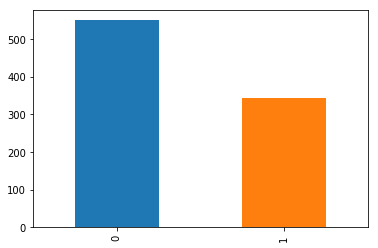

In [22]:
train_df.Survived.value_counts().plot(kind='bar')

### Вопрос 2

_Что, на Ваш взгляд, может повысить шансы на выживание, а что понизить?_

## Pclass

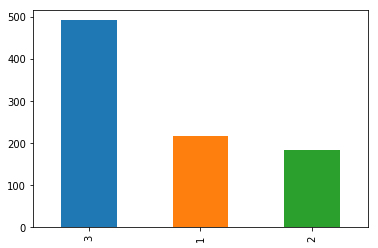

In [23]:
train_df.Pclass.value_counts().plot(kind='bar')

### Вопрос 3

_Есть ли зависимость между классом пассажира и его шансами на выживание?_

<details>
    <summary>Спойлер</summary>
    <p>Надо задать себе (или гуглу) следующие вопросы:<br>
    1. Как сделать подвыборку данных?<br>
    2. Как разбить классы пассажиров на две части? (выжили не выжили)<br>
    3. <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html>Как сгруппировать данные</a> и <a href=https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html>как построить график?</a></p>
</details>

__Ответ__:

## Age

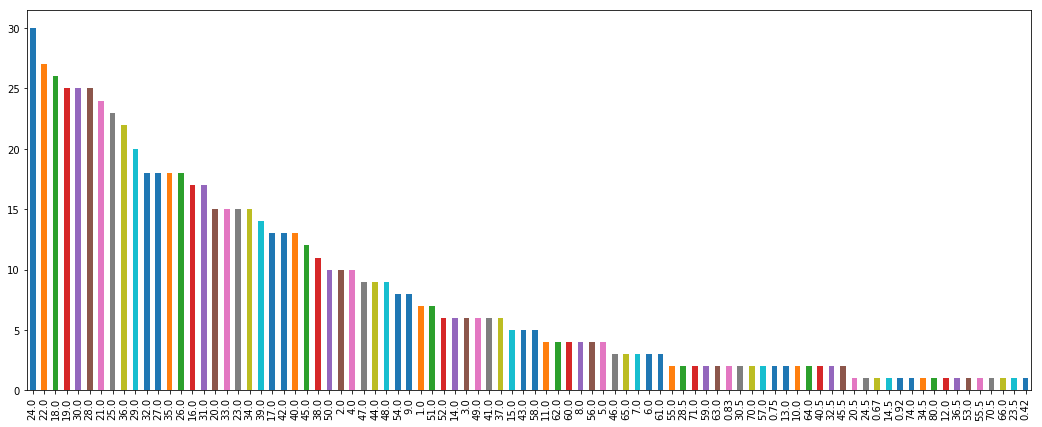

In [28]:
train_df.Age.value_counts().plot(kind='bar', figsize=(18, 7))

### Вопрос 4

_Почему у некоторых людей пропущен возраст? Что можно с этим сделать?_

<details>
    <summary>Спойлер</summary>
    <p><a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html>Последний шанс уйти</a></p>
    <p><a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html>Ну прям совсем последний шанс</a></p>
    <p>Наверно, девушки не говорили, но это еще проверить бы надо</p>
</details>

__Ответ__: <strike>Неприлично спрашивать возраст!<strike/>

### Вопрос 5

_Можно ли как-то сгруппировать возраста, чтобы возраст 22 и 24 были в какой-то одной группе, а 55 и 60 в другой. Если да, то придумайте эти группы и нарисуйте новый график. И если у вас получилось, то ответьте, почему это может быть полезно?_

<details>
    <summary>Спойлер 1</summary>
    <p>Вообще можно, например так: 0-10, 11-18, 19-25, 26-30, ну и так далее.</p>
    <p>Вопрос в том, как лучше их бить</p>
</details>

<details>
    <summary>Спойлер 2</summary>
    <p>Авторы думают, что норм обозначать интервалы строками</p>
</details>

<details>
    <summary>Спойлер 3</summary>
    <p>А еще стоит попробовать гистограммы построить df.plot(kind='hist')</p>
</details>

__Ответ__: <strike>Часики то тикают</strike>

## Parch (семейные отношения)

In [30]:
# Количество детей и родителей связанных с человеком
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Довольно много людей ехали одни.

Однако сказано, что 0 может обозначать также, что человек ехал с няней.

### Вопрос 6
_Попробуйте найти детей и их сопровождающих_

<details>
    <summary>Спойлер</summary>
    <p><a href=https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html>Для любителей SQL</a></p>
    <p>Надо бы как-то выбрать <b>детей</b>, которые одни и посмотреть, кто еще с ними был в каюте 
        <br>Из этого можно сделать новую линию отношений
    </p>
</details>

__Ответ__: 